- Nombre: Marcus Alexander Mayorga Martínez
- Fecha: 26 de mayo del 2025

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Cargar los datos del CSV

In [51]:
#Cargar los datos desde el archivo CSV
try:
    df = pd.read_csv('prueba.csv')
    print("Archivo 'prueba.csv' cargado exitosamente.")
    print("Primeras 5 filas del DataFrame:")
    print(df.head())
    print(f"\nForma del DataFrame: {df.shape}")

    #Separar características (X) y variable objetivo (y)
    X_data = df[['feature1', 'feature2', 'feature3']].values
    y_data = df['target'].values

    print(f"\nForma de X_data: {X_data.shape}")
    print(f"Forma de y_data: {y_data.shape}")
    print("\nPrimeros 5 ejemplos de X_data:\n", X_data[:5])
    print("\nPrimeros 5 ejemplos de y_data:\n", y_data[:5])

except FileNotFoundError:
    print("Error: El archivo 'prueba.csv' no se encontró en el directorio actual.")
    print("Por favor, asegúrate de que el archivo está en la misma carpeta que tu notebook o proporciona la ruta completa.")

Archivo 'prueba.csv' cargado exitosamente.
Primeras 5 filas del DataFrame:
   feature1  feature2  feature3     target
0  3.745401 -2.778922  0.140084  12.311567
1  9.507143 -3.801346  0.518330  30.468202
2  7.319939 -1.623848  0.877373  29.120300
3  5.986585  4.429097  0.740769  23.364120
4  1.560186 -1.767971  0.697016   9.922928

Forma del DataFrame: (131, 4)

Forma de X_data: (131, 3)
Forma de y_data: (131,)

Primeros 5 ejemplos de X_data:
 [[ 3.74540119 -2.7789219   0.14008402]
 [ 9.50714306 -3.80134633  0.51832965]
 [ 7.31993942 -1.62384829  0.87737307]
 [ 5.98658484  4.42909704  0.74076862]
 [ 1.5601864  -1.76797068  0.69701574]]

Primeros 5 ejemplos de y_data:
 [12.31156733 30.46820164 29.12029965 23.36411965  9.92292831]


### Ejercio 1: Lectura y preparacion de datos

In [52]:
print(f"Forma de X_data: {X_data.shape}")
print(f"Forma de y_data: {y_data.shape}")
print("-" * 30)

Forma de X_data: (131, 3)
Forma de y_data: (131,)
------------------------------


### Ejercicio 2: Division del conjunto de datos

In [53]:
n_total = X_data.shape[0]
n_train = int(n_total * 0.8)

np.random.seed(42)
indices_aleatorios = np.random.permutation(n_total)
X_shuffled = X_data[indices_aleatorios]
y_shuffled = y_data[indices_aleatorios]

X_train = X_shuffled[:n_train]
y_train = y_shuffled[:n_train]
X_test = X_shuffled[n_train:]
y_test = y_shuffled[n_train:]

print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_test: {y_test.shape}")
print("-" * 30)

Tamaño de X_train: (104, 3)
Tamaño de y_train: (104,)
Tamaño de X_test: (27, 3)
Tamaño de y_test: (27,)
------------------------------


### Ejercicio 3: Calculo de distancias

In [54]:
muestra_test_idx = 0
muestra_test = X_test[muestra_test_idx]

print(f"Muestra de prueba seleccionada (X_test[{muestra_test_idx}]): {muestra_test}")
print(f"Valor real correspondiente (y_test[{muestra_test_idx}]): {y_test[muestra_test_idx]}")

#Calcular distancias euclidianas
diferencias = X_train - muestra_test
cuadrado_diferencias = diferencias ** 2
suma_cuadrados = np.sum(cuadrado_diferencias, axis=1)
distancias = np.sqrt(suma_cuadrados)

#Mostrar las primeras 5 distancias calculadas
print(f"Primeras 5 distancias calculadas:\n{distancias[:5]}")
print(f"Toral de distancias calculadas: {distancias.shape[0]}")
print("-" * 30)

Muestra de prueba seleccionada (X_test[0]): [0.7697991  4.40458584 0.01822183]
Valor real correspondiente (y_test[0]): 4.389553376061775
Primeras 5 distancias calculadas:
[8.53975469 9.26442973 2.19001489 3.2268449  9.45317356]
Toral de distancias calculadas: 104
------------------------------


### Ejercicio 4: Seleccion de vecinos mas cercanos

In [55]:
k = 5
print(f"Valor de k: {k}")

indices_vecinos_cercanos = np.argpartition(distancias, k)[:k]

print(f"Indices de los {k} vecinos más cercanos en X_train: {indices_vecinos_cercanos}")
print(f"Distancias de estos {k} vecinos más cercanos:\n{distancias[indices_vecinos_cercanos]}")
print("-" * 30)

Valor de k: 5
Indices de los 5 vecinos más cercanos en X_train: [76 48 97 56 87]
Distancias de estos 5 vecinos más cercanos:
[0.82884934 0.87057438 1.10322539 1.64114503 2.00168757]
------------------------------


### Ejercicio 5: Extraccion de valores asociados a los vecinos

In [56]:
valores_y_vecinos = y_train[indices_vecinos_cercanos]
print(f"Valores 'y' de los vecinos más cercanos:\n{valores_y_vecinos}")
print("-" * 30)

Valores 'y' de los vecinos más cercanos:
[ 2.17589702  7.7220662   9.80764495  3.86036186 11.96724129]
------------------------------


### Ejercicio 6: Prediccion

In [57]:
y_pred = np.mean(valores_y_vecinos)

print(f"Predicción para la muestra de prueba (y_pred): {y_pred:.2f}")
print("-" * 30)

Predicción para la muestra de prueba (y_pred): 7.11
------------------------------


### Ejercicio 7: Calculo de error

In [58]:
error_absoluto = np.abs(y_pred - y_test[muestra_test_idx])
error_cuadratico = (y_pred - y_test[muestra_test_idx]) ** 2

#Mostrar errores
print(f"Valor real de la muestra: {y_test[muestra_test_idx]}")
print(f"Valor predicho: {y_pred:.2f}")
print(f"Error absoluto: {error_absoluto:.2f}")
print(f"Error cuadrático: {error_cuadratico:.2f}")
print("-" * 30)

Valor real de la muestra: 4.389553376061775
Valor predicho: 7.11
Error absoluto: 2.72
Error cuadrático: 7.38
------------------------------


### Ejercicio 8: Analisis y explicacion de resultados

El conjunto de datos original tiene 3 características.
Se dividió en 104 muestras de entrenamiento y 27 de prueba.
Se seleccionó la muestra de prueba X_test[0] = [0.7697991  4.40458584 0.01822183] con un valor real y_test[0] = 4.389553376061775.
Utilizando k=5 vecinos, se calcularon las distancias euclidianas entre esta muestra y todos los puntos en X_train.
Los 5 vecinos más cercanos en X_train tuvieron los siguientes valores de y_train: [ 2.17589702  7.7220662   9.80764495  3.86036186 11.96724129].
El promedio de estos valores 'y' de los vecinos resultó en una predicción y_pred = 7.11.
El error absoluto entre el valor predicho y el real para esta muestra es de 2.72.
El error cuadrático para esta muestra es de 7.38.

Comentario sobre la coherencia y comportamiento del modelo para esta predicción puntual:
El valor predicho (7.11) tiene una coherencia aceptable con el valor real (4.389553376061775).
El error absoluto (2.72) es moderado (std de y_train: 9.16).
El modelo KNN con k={k} pro

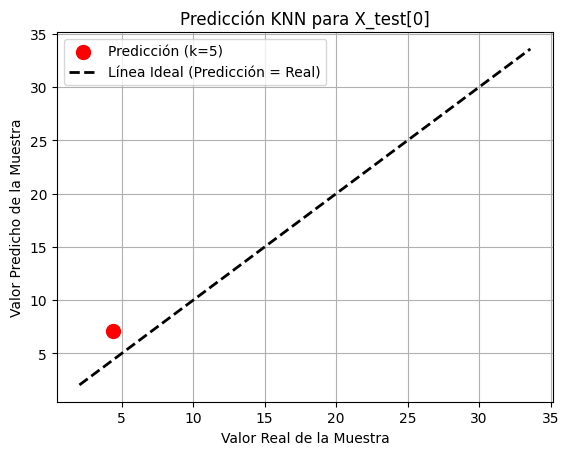

In [59]:
print(f"El conjunto de datos original tiene {X_data.shape[1]} características.")
print(f"Se dividió en {X_train.shape[0]} muestras de entrenamiento y {X_test.shape[0]} de prueba.")
print(f"Se seleccionó la muestra de prueba X_test[{muestra_test_idx}] = {muestra_test} con un valor real y_test[{muestra_test_idx}] = {y_test[muestra_test_idx]}.")
print(f"Utilizando k={k} vecinos, se calcularon las distancias euclidianas entre esta muestra y todos los puntos en X_train.")
print(f"Los {k} vecinos más cercanos en X_train tuvieron los siguientes valores de y_train: {valores_y_vecinos}.")
print(f"El promedio de estos valores 'y' de los vecinos resultó en una predicción y_pred = {y_pred:.2f}.")
print(f"El error absoluto entre el valor predicho y el real para esta muestra es de {error_absoluto:.2f}.")
print(f"El error cuadrático para esta muestra es de {error_cuadratico:.2f}.")

print("\nComentario sobre la coherencia y comportamiento del modelo para esta predicción puntual:")

std_y_train = np.std(y_train)
if error_absoluto < 0.2 * std_y_train :
    print(f"El valor predicho ({y_pred:.2f}) es bastante coherente con el valor real ({y_test[muestra_test_idx]}).")
    print(f"El error absoluto ({error_absoluto:.2f}) es relativamente pequeño en comparación con la dispersión de los datos de entrenamiento (std: {std_y_train:.2f}).")
    print("El modelo KNN, con k={k}, parece haber capturado adecuadamente la relación local para esta muestra.")
elif error_absoluto < 0.5 * std_y_train:
    print(f"El valor predicho ({y_pred:.2f}) tiene una coherencia aceptable con el valor real ({y_test[muestra_test_idx]}).")
    print(f"El error absoluto ({error_absoluto:.2f}) es moderado (std de y_train: {std_y_train:.2f}).")
    print("El modelo KNN con k={k} proporcionó una estimación razonable, aunque podría haber factores como ruido o un 'k' no óptimo que influyan.")
else:
    print(f"El valor predicho ({y_pred:.2f}) muestra una desviación considerable del valor real ({y_test[muestra_test_idx]}).")
    print(f"El error absoluto ({error_absoluto:.2f}) es significativo en comparación con la dispersión de los datos de entrenamiento (std: {std_y_train:.2f}).")
    print("Esto podría indicar que k={k} no es el valor óptimo para esta muestra, que la muestra es un outlier, o que la relación local es compleja y no bien capturada por un simple promedio de vecinos.")


fig, ax = plt.subplots()
ax.scatter(y_test[muestra_test_idx], y_pred, color='red', label=f'Predicción (k={k})', s=100)
ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='Línea Ideal (Predicción = Real)')
ax.set_xlabel("Valor Real de la Muestra")
ax.set_ylabel("Valor Predicho de la Muestra")
ax.set_title(f"Predicción KNN para X_test[{muestra_test_idx}]")
ax.legend()
ax.grid(True)
plt.show()

# Ejercicios para Puntos Extra

Tamaño del paso (h): 0.02004


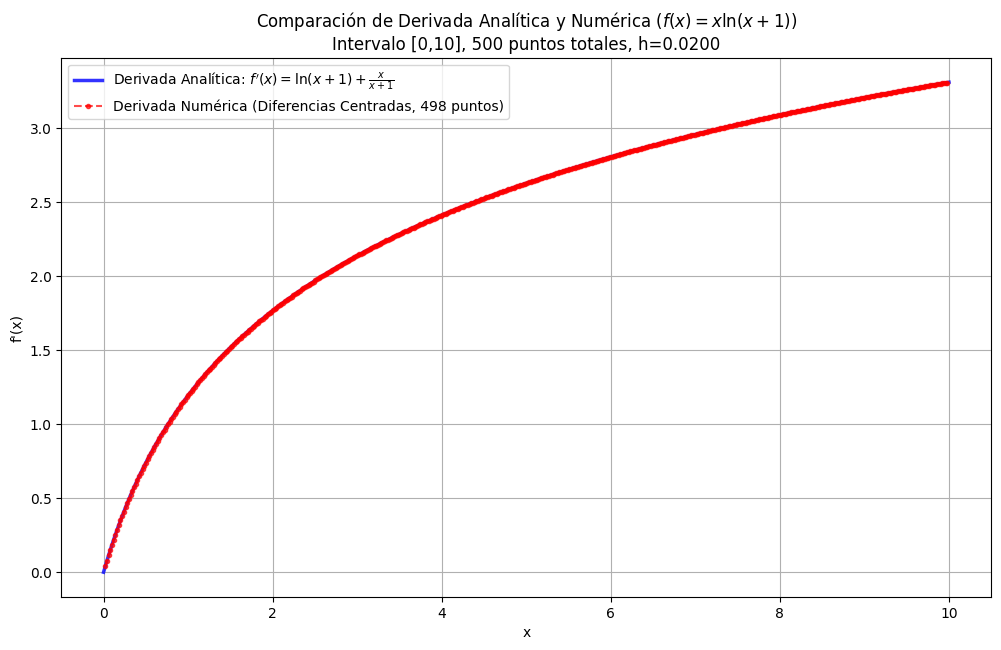


Resultados de la aproximación de la derivada:
Número de puntos para la derivada numérica: 498
Error máximo absoluto entre derivada analítica y numérica: 1.90e-04
Error absoluto medio entre derivada analítica y numérica: 1.25e-05
Error cuadrático medio entre derivada analítica y numérica: 9.18e-10


In [60]:
#Definir la función original f(x)
def f(x_val):
    return x_val * np.log(x_val + 1)

#Definir la derivada analítica f'(x)
def f_prime_analytical(x_val):
    return np.log(x_val + 1) + x_val / (x_val + 1)

#Generar los puntos equiespaciados en el intervalo [0, 10]
num_puntos = 500
x_puntos = np.linspace(0, 10, num_puntos)

#Calcular h (tamaño del paso)
h = x_puntos[1] - x_puntos[0]
print(f"Tamaño del paso (h): {h:.5f}")

#Calcular los valores de f(x) en los puntos generados
y_puntos = f(x_puntos)
f_prime_numerical = np.zeros(num_puntos - 2)

for i in range(1, num_puntos - 1):
    f_prime_numerical[i-1] = (y_puntos[i+1] - y_puntos[i-1]) / (2 * h)

x_puntos_derivada_numerica = x_puntos[1:-1]

y_prime_analytical_full = f_prime_analytical(x_puntos)
y_prime_analytical_comparacion = f_prime_analytical(x_puntos_derivada_numerica)

#Graficar ambas curvas
plt.figure(figsize=(12, 7))
plt.plot(x_puntos, y_prime_analytical_full, label='Derivada Analítica: $f\'(x) = \\ln(x+1) + \\frac{x}{x+1}$', color='blue', linewidth=2.5, alpha=0.8)
plt.plot(x_puntos_derivada_numerica, f_prime_numerical, label=f'Derivada Numérica (Diferencias Centradas, {num_puntos-2} puntos)', color='red', linestyle='--', marker='o', markersize=3, alpha=0.7)

plt.title(f'Comparación de Derivada Analítica y Numérica ($f(x) = x \\ln(x+1)$)\nIntervalo [0,10], {num_puntos} puntos totales, h={h:.4f}')
plt.xlabel('x')
plt.ylabel("f'(x)")
plt.legend()
plt.grid(True)
plt.show()

error_derivada = np.abs(y_prime_analytical_comparacion - f_prime_numerical)
error_maximo = np.max(error_derivada)
error_medio = np.mean(error_derivada)
error_mse = np.mean(error_derivada**2)

print(f"\nResultados de la aproximación de la derivada:")
print(f"Número de puntos para la derivada numérica: {len(f_prime_numerical)}")
print(f"Error máximo absoluto entre derivada analítica y numérica: {error_maximo:.2e}")
print(f"Error absoluto medio entre derivada analítica y numérica: {error_medio:.2e}")
print(f"Error cuadrático medio entre derivada analítica y numérica: {error_mse:.2e}")